<center><h1>Logistic Regression Approach</h1></center>

### Libraries

In [8]:
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import sklearn.ensemble as se
import sklearn.feature_selection as fs
import sklearn.impute as si
import sklearn.linear_model as lm
import sklearn.metrics as sm
import sklearn.model_selection as ms
import xgboost as xg
from itertools import combinations
from tqdm import tqdm

### Data Loading

In [10]:
train_X = np.loadtxt('train_X.csv')
train_y = np.loadtxt('train_y.csv')
test_X = np.loadtxt('test_X.csv')
test_y = np.loadtxt('test_y.csv')
with open('features.pkl', 'rb') as f:
    features = pickle.load(f)

### Modeling

Before actually creating a model, we look into the classes ratio, to understand if there is any class imbalance.

In [11]:
print('Percentage of Patients with High HbA1c (y=1) compared to all (y=0 or y=1):', str(round(100*sum(train_y) / len(train_y), 1))+'%')

Percentage of Patients with High HbA1c (y=1) compared to all (y=0 or y=1): 8.3%


In [12]:
model = lm.LogisticRegression()

# Model Fit
logit = model.fit(train_X, train_y)

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Performance

In [13]:
predictions_train = logit.predict_proba(train_X)[:, 1]
predictions_test = logit.predict_proba(test_X)[:, 1]
print('In Sample AUC:', sm.roc_auc_score(train_y, predictions_train))
print('Out of Sample AUC: ', sm.roc_auc_score(test_y, predictions_test))

In Sample AUC: 0.7936248613459348
Out of Sample AUC:  0.7868088374389243


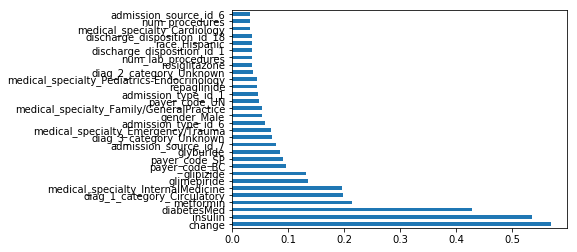

In [15]:
feat_importances = pd.Series(logit.coef_[0], index=features)
feat_importances.nlargest(30).plot(kind='barh')